# 0.0 IMPORTS

## 0.1 Bibliotecas


In [26]:
import numpy as np
import pandas as pd
import seaborn as sns


## 0.2 Helper Functions

## 0.3 Loading data

In [2]:
df = pd.read_csv('Data/train.csv')

In [3]:
df.head()

,id_do_caso,continente,educacao_do_empregado,tem_experiencia_de_trabalho,requer_treinamento_de_trabalho,num_de_empregados,ano_de_estabelecimento,regiao_de_emprego,salario_prevalecente,unidade_de_salario,posicao_em_tempo_integral,status_do_caso
0,EZYV10567,Europa,Ensino Médio,N,S,2087,1855,Sul,69711.24,Ano,S,Negado
1,EZYV5505,Ásia,Mestrado,S,N,5991,2003,Meio-Oeste,52931.38,Ano,S,Aprovado
2,EZYV5207,Ásia,Ensino Médio,N,N,1426,2000,Ilha,110830.21,Ano,S,Negado
3,EZYV7545,Ásia,Ensino Médio,N,N,3846,1992,Meio-Oeste,91884.68,Semana,S,Negado
4,EZYV16071,Ásia,Ensino Superior,S,N,3957,1949,Nordeste,138155.24,Ano,S,Aprovado


# 1.0 DATA DESCRIPTION

In [4]:
# fazendo uma copia do dataset
df1 = df.copy() 

## 1.1 Data Dimensions

In [5]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of coumns: {}'.format(df1.shape[1]))

Number of rows: 17836
Number of coumns: 12


## 1.2 Data Types

In [6]:
df1.dtypes

id_do_caso                         object
continente                         object
educacao_do_empregado              object
tem_experiencia_de_trabalho        object
requer_treinamento_de_trabalho     object
num_de_empregados                   int64
ano_de_estabelecimento              int64
regiao_de_emprego                  object
salario_prevalecente              float64
unidade_de_salario                 object
posicao_em_tempo_integral          object
status_do_caso                     object
dtype: object

## 1.3 Check NA

In [7]:
df1.isnull().sum()

id_do_caso                        0
continente                        0
educacao_do_empregado             0
tem_experiencia_de_trabalho       0
requer_treinamento_de_trabalho    0
num_de_empregados                 0
ano_de_estabelecimento            0
regiao_de_emprego                 0
salario_prevalecente              0
unidade_de_salario                0
posicao_em_tempo_integral         0
status_do_caso                    0
dtype: int64

## 1.4 Descriptive Statistics

In [12]:
# dados numericos
num_attributes = df1.select_dtypes(include=['int64', 'float64'])

# dados categoricos
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64'])

### 1.4.1. Numerical Atributes

In [15]:
'''Dava para usar o comando df1.describe(), porém a forma a seguir tem mais analises '''

# Central Tendency - mean, meadina
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T  # range
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T          # range
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T     # kurtosis

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,num_de_empregados,-26.0000,602069.00,602095.0000,5726.501850,2117.00,23320.723608,12.385660,210.492044
1,ano_de_estabelecimento,1800.0000,2016.00,216.0000,1979.494898,1997.00,42.096014,-2.030978,3.502421
2,salario_prevalecente,2.1367,319210.27,319208.1333,74327.428401,70106.92,52794.379516,0.763116,0.845217


Temos alguns valores estranhos, como pode ser visto na variavel 'num_de_empregados' que tem valor negativo.

### 1.4.2. Categorical Atributes

In [16]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

id_do_caso                        17836
continente                            6
educacao_do_empregado                 4
tem_experiencia_de_trabalho           2
requer_treinamento_de_trabalho        2
regiao_de_emprego                     5
unidade_de_salario                    4
posicao_em_tempo_integral             2
status_do_caso                        2
dtype: int64

In [42]:
print('continente: ',            df1['continente'].unique())
print('educacao_do_empregado: ', df1['educacao_do_empregado'].unique())
print('regiao_de_emprego: ',     df1['regiao_de_emprego'].unique())
print('unidade_de_salario: ',    df1['unidade_de_salario'].unique())
print('regiao_de_emprego: ',     df1['regiao_de_emprego'].unique())

continente:  ['Europa' 'Ásia' 'América do Sul' 'América do Norte' 'África' 'Oceania']
educacao_do_empregado:  ['Ensino Médio' 'Mestrado' 'Ensino Superior' 'Doutorado']
regiao_de_emprego:  ['Sul' 'Meio-Oeste' 'Ilha' 'Nordeste' 'Oeste']
unidade_de_salario:  ['Ano' 'Semana' 'Hora' 'Mês']
regiao_de_emprego:  ['Sul' 'Meio-Oeste' 'Ilha' 'Nordeste' 'Oeste']


<Axes: xlabel='status_do_caso', ylabel='Count'>

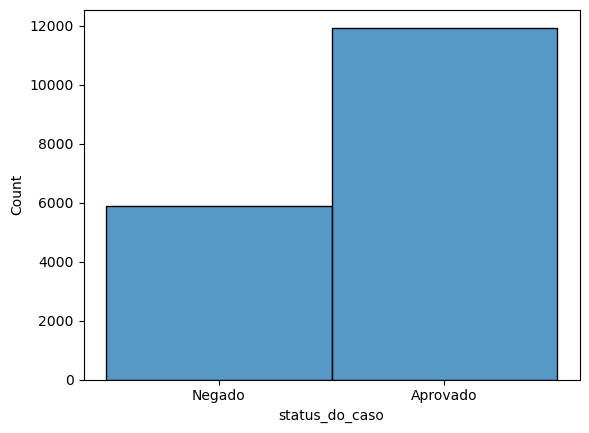

In [32]:
sns.histplot(data=df1, x='status_do_caso')

A variavel 'status_do_caso' esta desbalanceada, isso pode prejudicar o aprendizado do modelo.

# 2.0 FEATURE ENGINEERING

In [55]:
df2 = df1.copy()

In [57]:
df2.head().T

,0,1,2,3,4
id_do_caso,EZYV10567,EZYV5505,EZYV5207,EZYV7545,EZYV16071
continente,Europa,Ásia,Ásia,Ásia,Ásia
educacao_do_empregado,Ensino Médio,Mestrado,Ensino Médio,Ensino Médio,Ensino Superior
tem_experiencia_de_trabalho,N,S,N,N,S
requer_treinamento_de_trabalho,S,N,N,N,N
num_de_empregados,2087,5991,1426,3846,3957
ano_de_estabelecimento,1855,2003,2000,1992,1949
regiao_de_emprego,Sul,Meio-Oeste,Ilha,Meio-Oeste,Nordeste
salario_prevalecente,69711.24,52931.38,110830.21,91884.68,138155.24
unidade_de_salario,Ano,Ano,Ano,Semana,Ano


In [ ]:
'''
Hipoteses



'''